<a href="https://colab.research.google.com/github/trprince21/STATS101C_notes/blob/main/Week3_Discussion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # simple ways to simulate classification datasets
from sklearn.datasets import make_classification # ^^
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis # LDA QDA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Generate synthetic data
#X, y = make_blobs(n_samples=1000, centers=2, cluster_std = 5, n_features=2, random_state=0)

X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, n_classes=2, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test) # predictions on test data

print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))

LDA Accuracy: 0.935
Confusion Matrix:
 [[101   4]
 [  9  86]]


In [ ]:

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

y_pred_qda = qda.predict(X_test)

print("QDA Accuracy:", accuracy_score(y_test, y_pred_qda))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_qda))
#

QDA Accuracy: 0.92
Confusion Matrix:
 [[99  6]
 [10 85]]


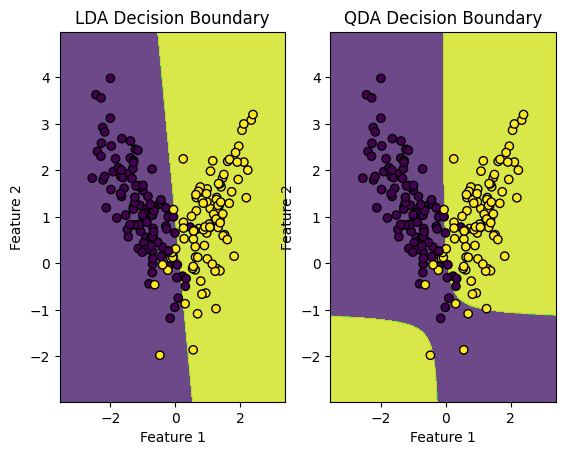

In [ ]:
def plot_decision_boundaries(X, y, model, title, subplot_index):
    plt.subplot(subplot_index)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plot_decision_boundaries(X_test, y_test, lda, "LDA Decision Boundary", 121)
plot_decision_boundaries(X_test, y_test, qda, "QDA Decision Boundary", 122)

plt.show()